# Lead Scoring Case Study

## Introduction
X Education is a leading provider of online courses designed for industry professionals. With a growing presence on websites and search engines like Google, the company acquires numerous leads each day. These leads are individuals who express interest in the courses by interacting with the website, such as filling out a form with their contact details. However, despite the high number of leads generated daily, the company struggles with a low lead conversion rate of around 30%. This presents a significant challenge, as the sales team has limited time and resources to engage with every lead.

To improve efficiency and drive higher conversion rates, X Education aims to focus its efforts on the most promising leads, also known as "Hot Leads." The goal is to identify these leads with the highest likelihood of converting into paying customers, allowing the sales team to target their communication efforts more effectively. The company's CEO has set a target conversion rate of 80%, and X Education is seeking to build a data-driven model to achieve this.

## Problem Statement

X Education has provided a dataset of past leads with various attributes that may influence conversion rates. The objective is to build a logistic regression model that assigns a lead score between 0 and 100, indicating the likelihood of conversion for each lead. A higher score suggests a greater probability of conversion, allowing the sales team to prioritize these leads. Additionally, the model should be adaptable to future requirements and evolving business needs.

Through this analysis, X Education hopes to boost its lead conversion rate by identifying "Hot Leads" and enabling the sales team to focus on the most promising opportunities, ultimately improving the company's overall sales performance.

## Steps for Completing the Case Study:
- Import necessary libraries and modules
- Load and explore the dataset for initial understanding
- Clean the Dataset
- Performing Eda(Exploratory Data Analysis)
- Prepare the data for model building
- Build the logistic regression model
- Evaluate the model's performance
- Make predictions on the test dataset
- Determining the important features
- final observationns

# Step 1: Import necessary libraries and modules





In [1]:
# Importing all the neccessary libraries for reading of data we can use pandas and for visualization we an use seaborn and matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")



# Step 2: Load and explore the dataset for initial understanding



In [2]:
# Reading the datasets
Lead_data = pd.read_csv("/content/Leads.csv")

In [3]:
# checking the datasets
Lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Checking the shape of the datasets

Lead_data.shape

(9240, 37)

In [5]:
# understanding the distribution, central tendency, and spread of the data, helping identify potential issues like missing or skewed data

Lead_data.describe()


,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Checking the data types of the variables

Lead_data.dtypes

,0
Prospect ID,object
Lead Number,int64
Lead Origin,object
Lead Source,object
Do Not Email,object
Do Not Call,object
Converted,int64
TotalVisits,float64
Total Time Spent on Website,int64
Page Views Per Visit,float64


In [7]:
# Checking all column of the datasets if there is any extra space in the columns we can remove by using strip function

Lead_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


# Step 3: Data Cleaning



### 3.1 Checking Null Values and Treating them


In [8]:
# Checking null values in all the column

Lead_data.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,36
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,137
Total Time Spent on Website,0
Page Views Per Visit,137


In [9]:
# checking the percentage of null values

((Lead_data.isnull().sum()/len(Lead_data.index))*100).sort_values(ascending= False)

,0
Lead Quality,51.590909
Asymmetrique Activity Index,45.649351
Asymmetrique Profile Score,45.649351
Asymmetrique Activity Score,45.649351
Asymmetrique Profile Index,45.649351
Tags,36.287879
Lead Profile,29.318182
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
Country,26.634199


### 3.2 Removing Redundant Columns




In [10]:
# Converting all list to columns
columns = Lead_data.columns.tolist()
# Checking the list
print(columns)


['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Lead Quality', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'Lead Profile', 'City', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [11]:
# Checking the value counts for all the variables

for column in columns:
    print(f"Value counts for:")
    print(Lead_data[column].value_counts(dropna = False))
    print("\n")  # Add a line break between each column's value counts
    print("="*100)


Value counts for:
Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64


Value counts for:
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64


Value counts for:
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


Value counts for:
Lead Source
Google        

#### In some of above columns like "Specialization", "How did you hear about x education", "Lead Profile", "city" having level select so transforming those value from select to nan values

In [12]:
# Columns need to transform
columns_to_transform = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']
# Replacing 'Select' with NaN in the specified columns
Lead_data[columns_to_transform] = Lead_data[columns_to_transform].replace('Select', np.nan)


In [13]:
# Now checking the null values after performing above transformation

round((Lead_data.isnull().sum() / len(Lead_data.index) * 100), 2).sort_values(ascending=False)


,0
How did you hear about X Education,78.46
Lead Profile,74.19
Lead Quality,51.59
Asymmetrique Profile Score,45.65
Asymmetrique Activity Score,45.65
Asymmetrique Activity Index,45.65
Asymmetrique Profile Index,45.65
City,39.71
Specialization,36.58
Tags,36.29


In [14]:
# Dropping all the column having more than or equal to 40% of null values

for column in Lead_data.columns:
    null_percentage = round((Lead_data[column].isnull().sum() / len(Lead_data.index)) * 100)
    if null_percentage >= 40:
        Lead_data.drop(column, axis=1, inplace=True)


In [15]:
round((Lead_data.isnull().sum() / len(Lead_data.index) * 100), 2).sort_values(ascending=False)


,0
Specialization,36.58
Tags,36.29
What matters most to you in choosing a course,29.32
What is your current occupation,29.11
Country,26.63
TotalVisits,1.48
Page Views Per Visit,1.48
Last Activity,1.11
Lead Source,0.39
Update me on Supply Chain Content,0.00


In [16]:
# Checking some redundant column

col_1 = ["Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","Receive More Updates About Our Courses","Magazine","Country"]

for i in col_1:
  print("The value counts for:",i)
  print(Lead_data[i].value_counts(dropna=False))  # Include null values in the count
  print("="*100)


The value counts for: Update me on Supply Chain Content
Update me on Supply Chain Content
No    9240
Name: count, dtype: int64
The value counts for: Get updates on DM Content
Get updates on DM Content
No    9240
Name: count, dtype: int64
The value counts for: I agree to pay the amount through cheque
I agree to pay the amount through cheque
No    9240
Name: count, dtype: int64
The value counts for: Receive More Updates About Our Courses
Receive More Updates About Our Courses
No    9240
Name: count, dtype: int64
The value counts for: Magazine
Magazine
No    9240
Name: count, dtype: int64
The value counts for: Country
Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France               

In [17]:
# Checking the shape of the dataset

Lead_data.shape

(9240, 29)

- As observed in the columns Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque, Receive More Updates About Our Courses, and Magazine, there is only one value: "No." This doesn't add much value to the analysis.




- In the Country column, a large portion of the values (6492 out of 9240) belong to India, with an additional 2461 null values. Together, 6492 + 2461 = 8953, meaning around 96% of the data is redundant. Therefore, it's more efficient to drop the Country column from the analysis.







In [18]:
# Dropping the redundant columns

Lead_data.drop(["Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque","Receive More Updates About Our Courses","Magazine","Country"], axis =1, inplace = True)

In [19]:
# Checking the null values again

((Lead_data.isnull().sum()/Lead_data.shape[0])*100).sort_values(ascending= False)

,0
Specialization,36.580087
Tags,36.287879
What matters most to you in choosing a course,29.318182
What is your current occupation,29.112554
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719
Lead Source,0.389610
Newspaper Article,0.000000
A free copy of Mastering The Interview,0.000000


In [20]:
Lead_data.shape

(9240, 23)

##### Perform Chi square test to determine which variables are statistically significant for predicting the target variable Converted.
 - To check if a variable is significant for predicting the target variable Converted, you can use statistical tests and methods that assess the relationship between independent variables and the target. One common approach is to use a Chi-Square test for categorical variables and Correlation or ANOVA for numerical variables.

 - A p-value less than 0.05 suggests that the variable is significant and has an impact on the target.


In [21]:
from scipy.stats import chi2_contingency

# Assuming Lead_data is your DataFrame
categorical_columns = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
                       'Last Activity', 'Specialization', 'What is your current occupation',
                       'What matters most to you in choosing a course', 'Search',
                       'Newspaper Article', 'X Education Forums', 'Newspaper',
                       'Digital Advertisement', 'Through Recommendations', 'Tags',
                       'A free copy of Mastering The Interview', 'Last Notable Activity']

# Function to perform Chi-Square Test
def chi_square_test(column):
    contingency_table = pd.crosstab(Lead_data[column], Lead_data['Converted'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

# Apply Chi-Square Test to all categorical variables
for column in categorical_columns:
    p_value = chi_square_test(column)
    print(f"Chi-Square Test for {column}: p-value = {p_value}")

Chi-Square Test for Lead Origin: p-value = 1.93831790477878e-211
Chi-Square Test for Lead Source: p-value = 4.0834502966012515e-212
Chi-Square Test for Do Not Email: p-value = 1.3384599721779416e-38
Chi-Square Test for Do Not Call: p-value = 0.2893275634129693
Chi-Square Test for Last Activity: p-value = 1.269441954093108e-298
Chi-Square Test for Specialization: p-value = 0.00017533061721243615
Chi-Square Test for What is your current occupation: p-value = 4.0070810643261665e-128
Chi-Square Test for What matters most to you in choosing a course: p-value = 0.6198474529719338
Chi-Square Test for Search: p-value = 1.0
Chi-Square Test for Newspaper Article: p-value = 1.0
Chi-Square Test for X Education Forums: p-value = 1.0
Chi-Square Test for Newspaper: p-value = 1.0
Chi-Square Test for Digital Advertisement: p-value = 0.9659371166887805
Chi-Square Test for Through Recommendations: p-value = 0.16145726251934528
Chi-Square Test for Tags: p-value = 0.0
Chi-Square Test for A free copy of Mas

**Significant Variables (p-value < 0.05):**
- Lead Origin (p-value = 1.93e-211)
- Lead Source (p-value = 4.08e-212)
- Do Not Email (p-value = 1.33e-38)
- Last Activity (p-value = 1.27e-298)
- Specialization (p-value = 0.000175)
- What is your current occupation (p-value = 4.00e-128)
- Tags (p-value = 0.0)
- A free copy of Mastering The Interview (p-value = 0.000142)
- Last Notable Activity (p-value = 4.23e-279)

These variables are highly significant and should be considered in your model.

**Insignificant Variables (p-value > 0.05):**
- Do Not Call (p-value = 0.289)
- What matters most to you in choosing a course (p-value = 0.619)
- Search (p-value = 1.0)
- Newspaper Article (p-value = 1.0)
- X Education Forums (p-value = 1.0)
- Newspaper (p-value = 1.0)
- Digital Advertisement (p-value = 0.965)
- Through Recommendations (p-value = 0.161)

These variables are not statistically significant, indicating that they may not add much value to the prediction of conversion.

In [22]:
# Checking the value counts of some of statistically insignificant variables

col_2 = ["Newspaper","X Education Forums","Newspaper Article","Through Recommendations","Do Not Call","What matters most to you in choosing a course","Digital Advertisement"]
for i in col_2:
  print("The value counts for:",i)
  print(Lead_data[i].value_counts(dropna=False))  # Include null values in the count
  print("="*100)


The value counts for: Newspaper
Newspaper
No     9239
Yes       1
Name: count, dtype: int64
The value counts for: X Education Forums
X Education Forums
No     9239
Yes       1
Name: count, dtype: int64
The value counts for: Newspaper Article
Newspaper Article
No     9238
Yes       2
Name: count, dtype: int64
The value counts for: Through Recommendations
Through Recommendations
No     9233
Yes       7
Name: count, dtype: int64
The value counts for: Do Not Call
Do Not Call
No     9238
Yes       2
Name: count, dtype: int64
The value counts for: What matters most to you in choosing a course
What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64
The value counts for: Digital Advertisement
Digital Advertisement
No     9236
Yes       4
Name: count, dtype: int64


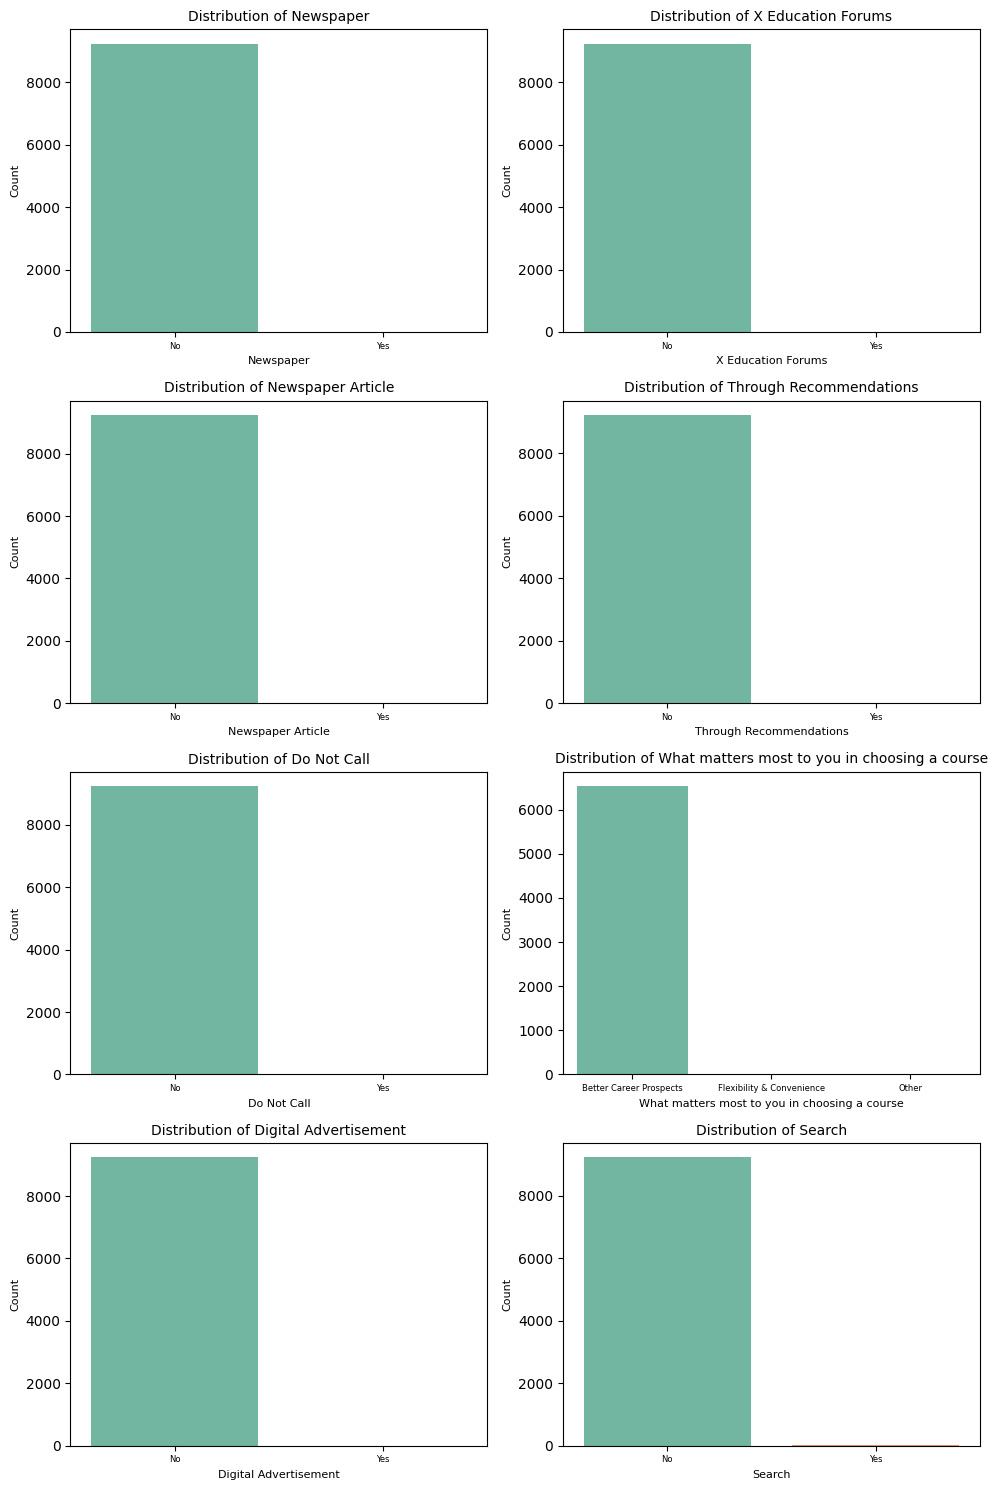

In [23]:
# Checking the distribution of statistically significant variables

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# List of categorical columns
col_2 = ["Newspaper", "X Education Forums", "Newspaper Article",
         "Through Recommendations", "Do Not Call",
         "What matters most to you in choosing a course",
         "Digital Advertisement","Search"]

# Set the number of rows and columns for the subplot grid
rows = 4  # Increased to fit all 7 plots
cols = 2

# Create a figure and axis object with the desired grid size
fig, axes = plt.subplots(rows, cols, figsize=(10, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot it in the respective subplot
for i, col in enumerate(col_2):
    # Create the count plot on the current axis
    sns.countplot(data=Lead_data, x=col, palette='Set2', ax=axes[i])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)

    # Rotate x-axis labels and set their font size
    axes[i].tick_params(axis='x', labelsize=6)

# Hide any unused subplots
for j in range(len(col_2), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()


Upon reviewing the value counts of the columns, it was observed that several columns predominantly contain only one value across all data points. These columns include Do Not Call, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations. Since the majority of values in these columns are "No," they offer minimal insight for our analysis. Therefore, it is advisable to drop these columns and as per chi square test they are statistically insignificant also.








In [24]:
# Dropping all redundant columns. They are not providing any variety

Lead_data.drop(["Newspaper","X Education Forums","Newspaper Article","Through Recommendations","Do Not Call","Digital Advertisement","What matters most to you in choosing a course","Search"], axis = 1, inplace = True)

In [25]:
# Dropping all unnecessary columns

Lead_data.drop(["Prospect ID","Lead Number"], axis = 1, inplace = True)

In [26]:
# In this column there is high number of null values so drop this column

Lead_data.drop("Tags", axis = 1 , inplace = True)

In [27]:
# Checking the final shape of Lead_data

Lead_data.shape

(9240, 12)

In [28]:
# Convert remaining column into list
Final_col = Lead_data.columns.tolist()
print(Final_col)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Specialization', 'What is your current occupation', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [29]:
for i in Final_col:
  print("The value counts for:",i)
  print(Lead_data[i].value_counts(dropna=False))  # Include null values in the count
  print("="*100)


The value counts for: Lead Origin
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
The value counts for: Lead Source
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64
The value counts for: Do Not Email
Do Not Email
No     8506
Yes     734
Name: count, dtype: int64
The value counts for: Conv

In [30]:
# Treating remaining null values

Lead_data.isnull().sum().sort_values(ascending = False)

,0
Specialization,3380
What is your current occupation,2690
TotalVisits,137
Page Views Per Visit,137
Last Activity,103
Lead Source,36
Lead Origin,0
Do Not Email,0
Converted,0
Total Time Spent on Website,0


In [31]:
# Dropping the null values rows in the column 'Page Views Per Visit'

Lead_data = Lead_data[~pd.isnull(Lead_data['Page Views Per Visit'])]

In [32]:
# Dropping the null values rows in the column 'Lead Source'

Lead_data = Lead_data[~pd.isnull(Lead_data['Lead Source'])]

In [33]:
# checking the null values

Lead_data.isnull().sum().sort_values(ascending=False)

,0
Specialization,3282
What is your current occupation,2683
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0


In [34]:
# Checking the value counts of specialization column

Lead_data['Specialization'].value_counts(dropna = False)

,count
Specialization,
NaN,3282
Finance Management,959
Human Resource Management,837
Marketing Management,823
Operations Management,499
Business Administration,399
IT Projects Management,366
Supply Chain Management,346
"Banking, Investment And Insurance",335


In [35]:
# Replace null values in the 'Specialization' column with 'Not Given'
Lead_data['Specialization'] = Lead_data['Specialization'].fillna('Not Given')

# Replace null values in the 'What is your current occupation' column with 'Not Given'
Lead_data['What is your current occupation'] = Lead_data['What is your current occupation'].fillna('Not Given')



In [36]:
# All the null values is treated
Lead_data.isnull().sum()

,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0
Last Activity,0
Specialization,0
What is your current occupation,0


In [37]:
# Check the shape of the final data
Lead_data.shape

(9074, 12)

In [38]:
# Check how much data retained after data cleaning
round(100*((Lead_data.shape[0])/9240),2)

# Intially when we checked we have total 9240 rows and we retained 98.2% of data

98.2

#Step 4: Performing Eda

In [39]:
# Taking the basic information of the dataset

Lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  A free copy of Mastering The Interview  9074 non-null   object 
 

In [40]:
# Select only numeric columns
numeric_cols = Lead_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation on numeric columns
correlation_matrix = Lead_data[numeric_cols].corr()

# Display the correlation matrix
correlation_matrix


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


###4.1: Univariate Analysis

In [41]:
# Checking the columns of the final dataset
Lead_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [42]:
# replacing google with Google

Lead_data["Lead Source"] = Lead_data["Lead Source"].replace("google","Google")

### 4.1.1 Categorical Columns

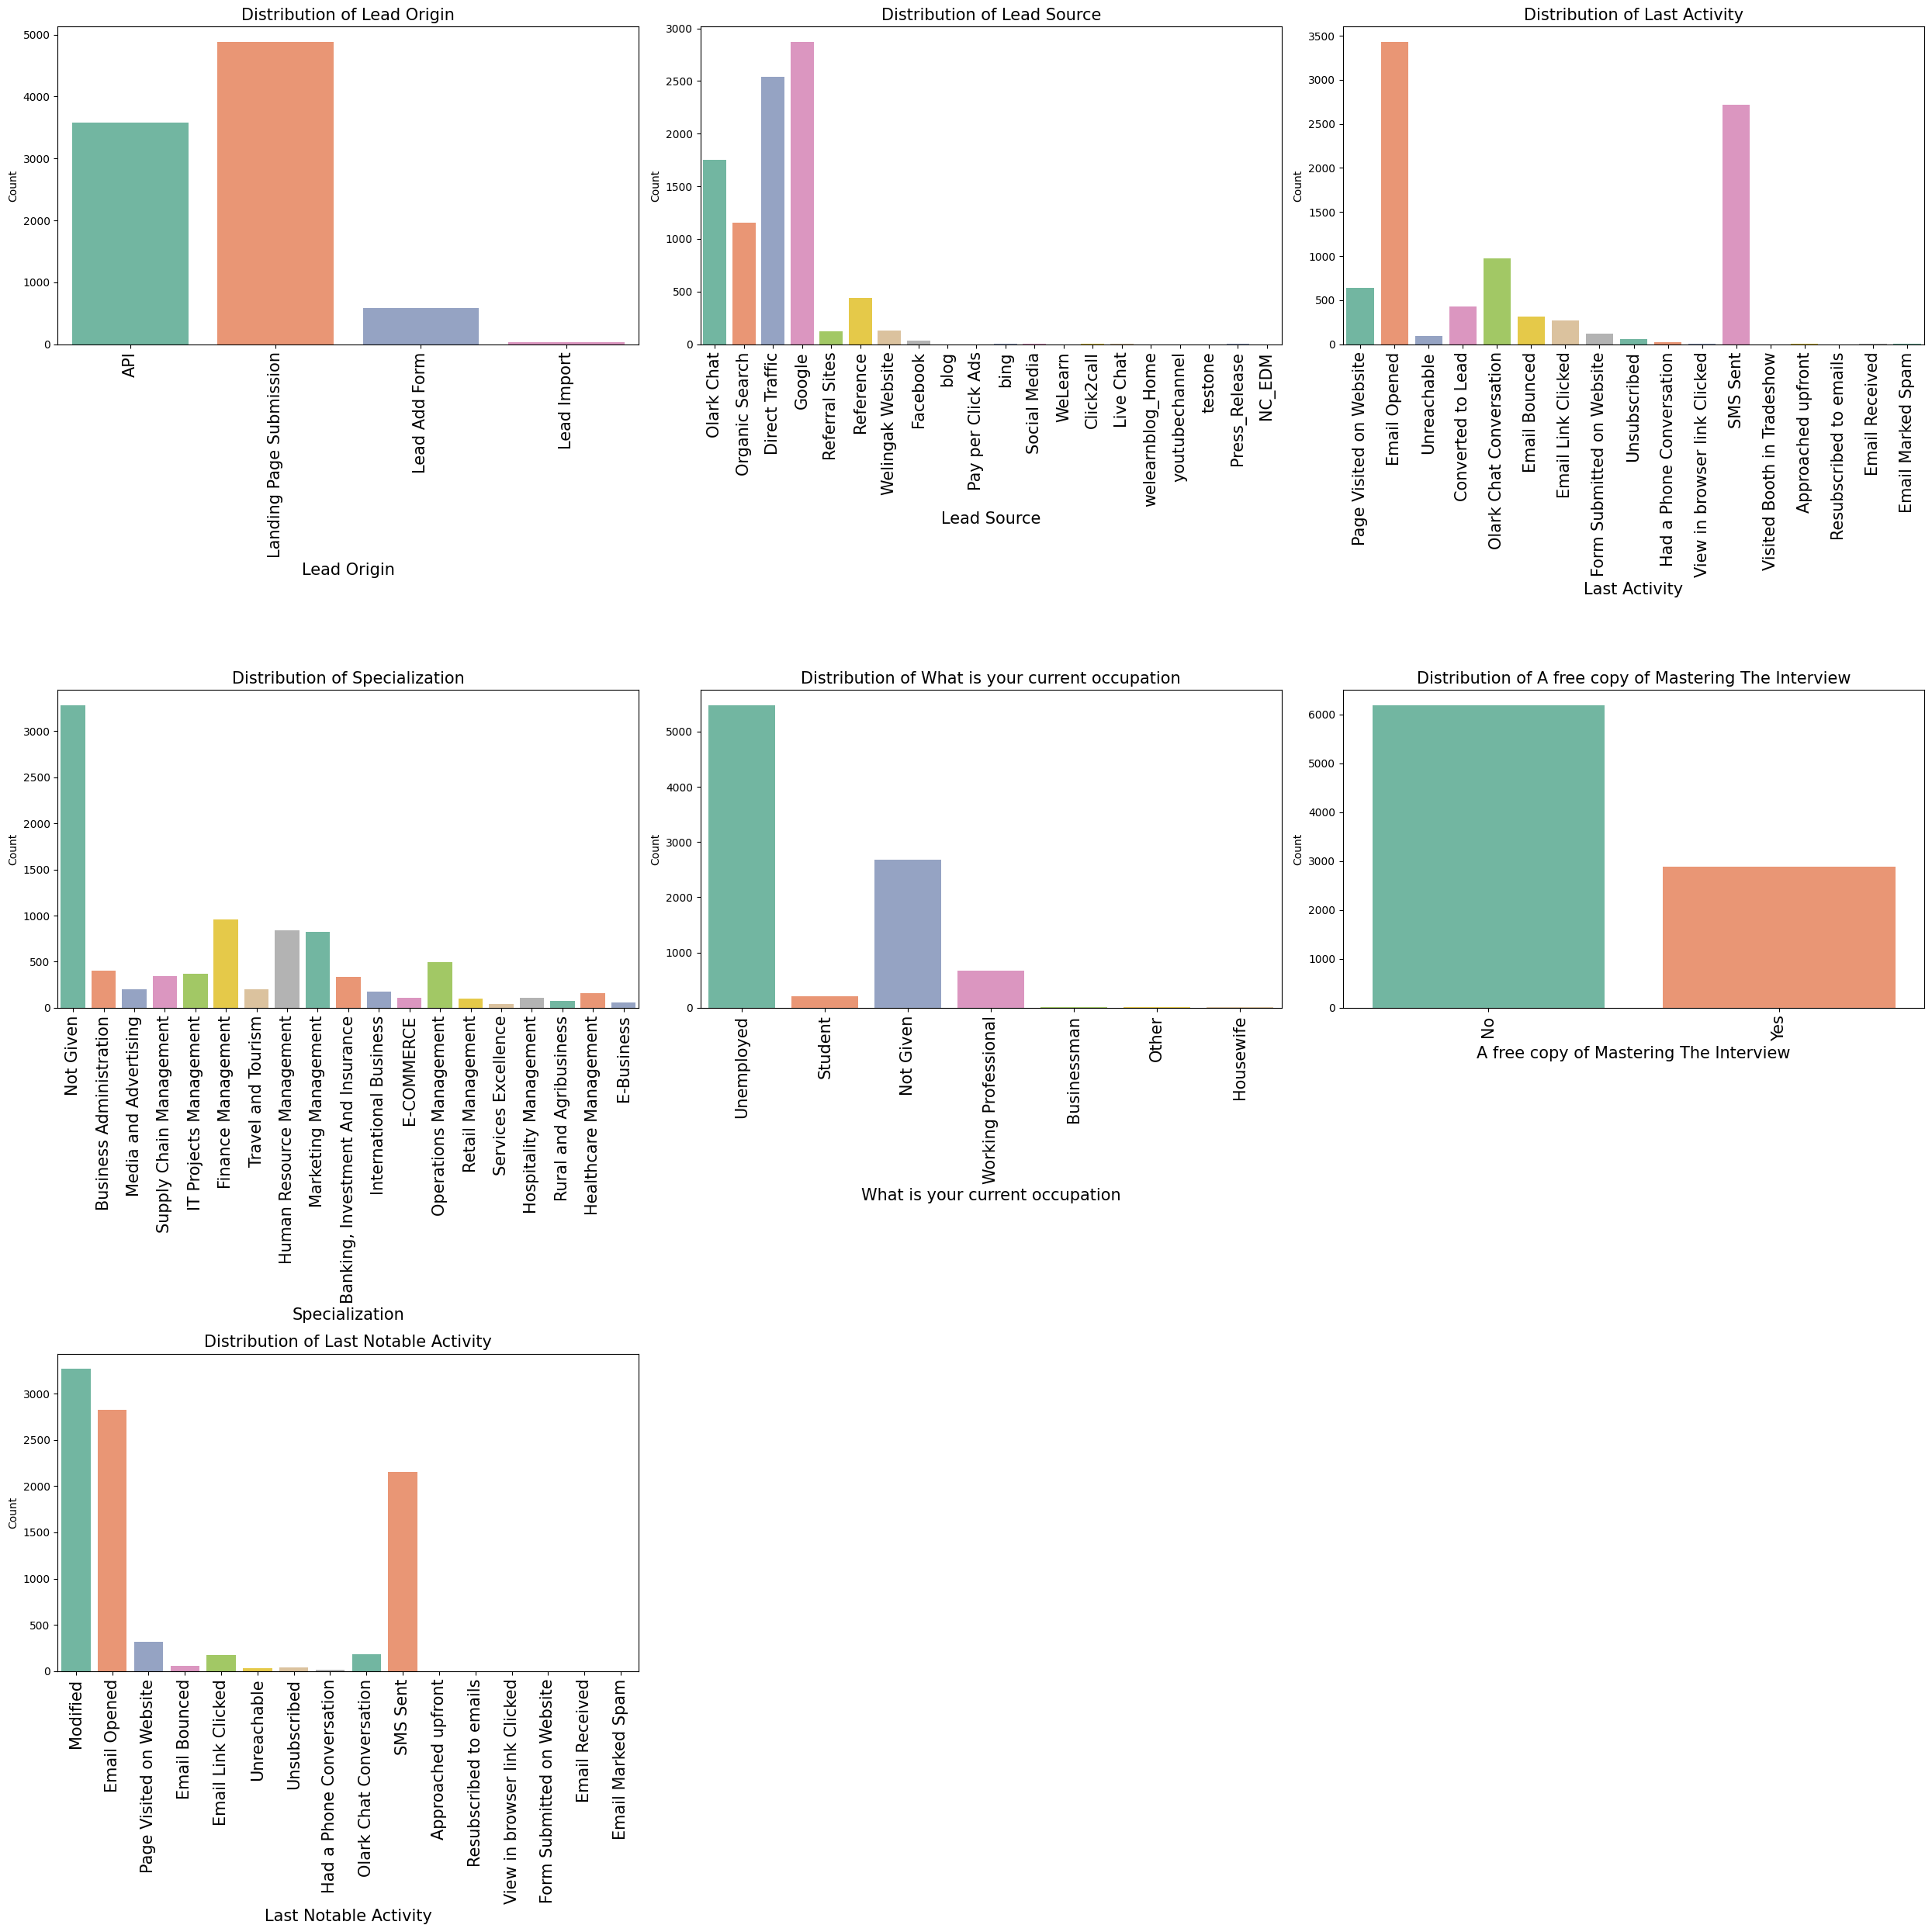

In [43]:

# List of columns to plot
col_2 = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']

# Set the number of rows and columns for the subplot grid
rows = 3  # Increased to fit all 9 plots
cols = 3

# Create a figure and axis object with the desired grid size
fig, axes = plt.subplots(rows, cols, figsize=(25, 25))  # Adjusted figsize

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot it in the respective subplot
for i, col in enumerate(col_2):
    # Create the count plot on the current axis
    sns.countplot(data=Lead_data, x=col, palette='Set2', ax=axes[i])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=15)
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel('Count', fontsize=10)

    # Rotate x-axis labels and set their font size
    axes[i].tick_params(axis='x', labelsize=15, rotation=90)

# Hide any unused subplots (if any)
for j in range(len(col_2), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()


### Observations
- Upon analyzing the Lead Origin feature, it was observed that the majority of the leads were generated through the Landing Page Submission channel.
Here’s a refined version of your observations:

- The **Google** lead source has the highest representation among all lead sources. This suggests that a significant portion of the leads are generated through Google searches or advertisements.

- The most common last activity performed by the leads is **Email Opened**, indicating that many leads engage with the company's email campaigns.

- A large number of leads have the value **'Not Provided'** in the Specialization field, meaning these individuals did not select a specific specialization when filling out the form.

-  The **Unemployed** category has the highest representation among lead occupations. This may suggest that individuals looking to improve their employability or upskill are more likely to show interest in X Education's courses, indicating a potential target audience for future marketing efforts.

- A majority of leads have indicated **No** to receiving a free copy of 'Mastering The Interview.'

- Similar to the last activity, **Email Opened** appears as the most frequent last notable activity.




### 4.1.2 Numerical Columns

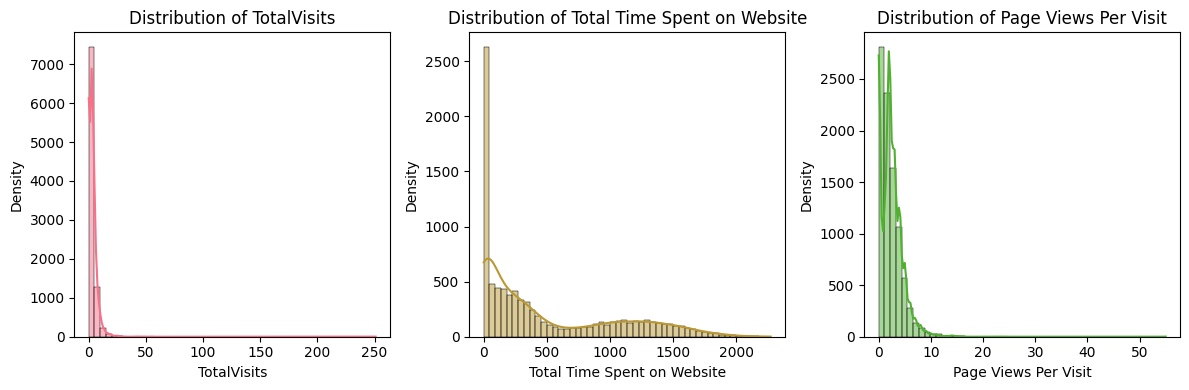

In [44]:
# Numerical columns to plot
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

# Set the number of rows and columns for the subplot grid
rows = 1
cols = len(num_cols)  # 3 columns for the 3 numerical columns

# Create a figure and axis object with the desired grid size
fig, axes = plt.subplots(rows, cols, figsize=(12, 4))  # Medium-sized figure

# Loop through each numerical column and plot a histogram
for i, col in enumerate(num_cols):
    sns.histplot(data=Lead_data, x=col,bins = 50, kde=True, color=sns.color_palette('husl')[i], ax=axes[i])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()


### 4.1.3 Outlier Analysis

In [45]:
# doing statistical analysis

Lead_data.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000
mean,0.378554,3.456028,482.887481,2.370151
std,0.485053,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,11.000000,1.000000
50%,0.000000,3.000000,246.000000,2.000000
75%,1.000000,5.000000,922.750000,3.200000
max,1.000000,251.000000,2272.000000,55.000000


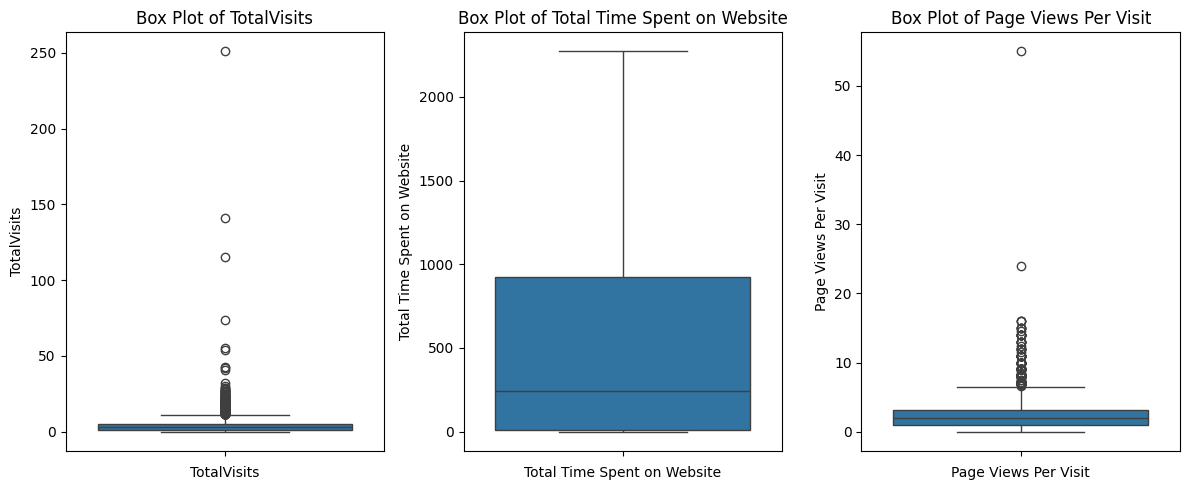

In [46]:
# creating function for box plots

def plot_boxplots(data, columns):
    # Determine the number of rows and columns for the grid
    rows = 1
    cols = len(columns)

    plt.figure(figsize=(12,5))  # Adjust figsize as needed

    for i, col in enumerate(columns):
        plt.subplot(rows, cols, i + 1)  # Create a grid of subplots
        sns.boxplot(data[col])
        plt.title(f'Box Plot of {col}')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

columns = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

plot_boxplots(Lead_data, columns)

- As we cannot see any major outlier so we don't need to do the outlier treatment

### 4.2 Target Variable

In [47]:
# checking the value counts of target variable "Converted"
Lead_data["Converted"].value_counts()

,count
Converted,
0,5639
1,3435


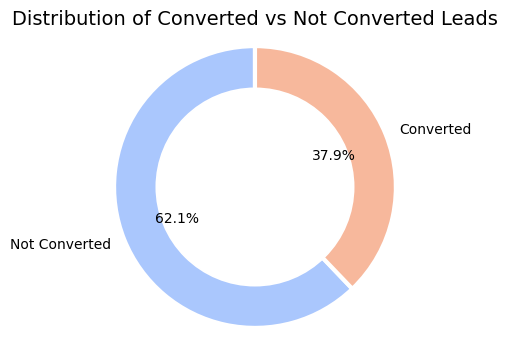

In [48]:

# Data for the pie chart (value counts)
labels = ['Not Converted', 'Converted']
sizes = [5639, 3435]  # Values from Converted column
colors = sns.color_palette('coolwarm',2)  # Color palette for the chart

# Create a pie chart with a hole in the center to make it a donut chart
fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})

# Draw a white circle in the center to create the donut shape
centre_circle = plt.Circle((0, 0), 0.70, color='white', fc='white', linewidth=1.25)
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set title
plt.title('Distribution of Converted vs Not Converted Leads', fontsize=14)

# Show the plot
plt.show()


- As we can see in above donut chart that convertion rate is only 37.9%

### 4.3 Bivariate Analysis

In [49]:

def create_2d_scatter(data, x_col, y_col, color_col='Converted'):
    plt.figure(figsize=(5,5))

    # Separate data for the two classes: Converted == 0 and Converted == 1
    data_0 = data[data[color_col] == 0]
    data_1 = data[data[color_col] == 1]

    # Plotting the scatter plot for each class separately to add a label for 0 and 1
    plt.scatter(data_0[x_col], data_0[y_col], c='red', label='Not Converted: 0', edgecolors='k')
    plt.scatter(data_1[x_col], data_1[y_col], c='blue', label='Converted: 1', edgecolors='k')

    # Adding labels and title
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.title(f'{x_col} vs {y_col}', fontsize=14)

    # Adding legend
    plt.legend()

    # Show the plot
    plt.show()

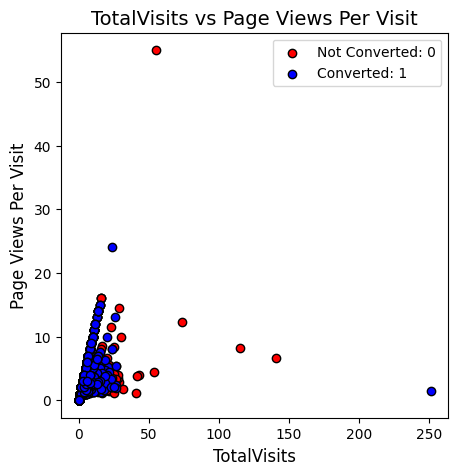

In [50]:
# Checking the relation between 'TotalVisits' and 'Page Views Per Visit'

create_2d_scatter(Lead_data, 'TotalVisits', 'Page Views Per Visit')


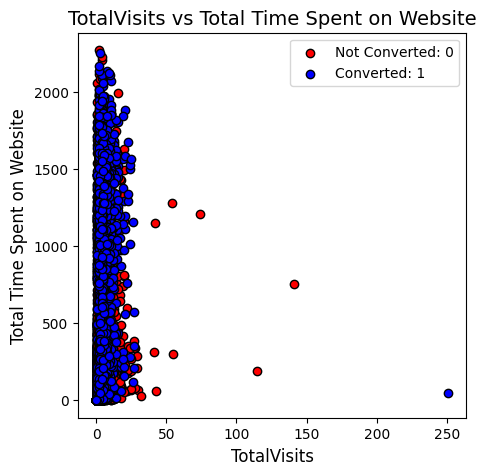

In [51]:
# Checking the relation between 'TotalVisits' and 'Total Time Spent on Website'


create_2d_scatter(Lead_data, 'TotalVisits', 'Total Time Spent on Website')


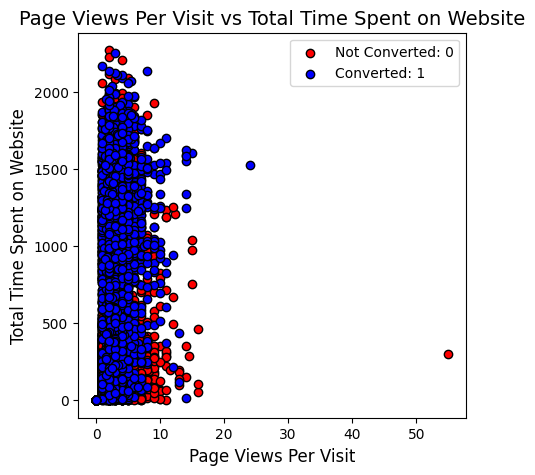

In [52]:
# Checking the relation between 'Page Views Per Visit' and 'Total Time Spent on Website'

create_2d_scatter(Lead_data, 'Page Views Per Visit', 'Total Time Spent on Website')


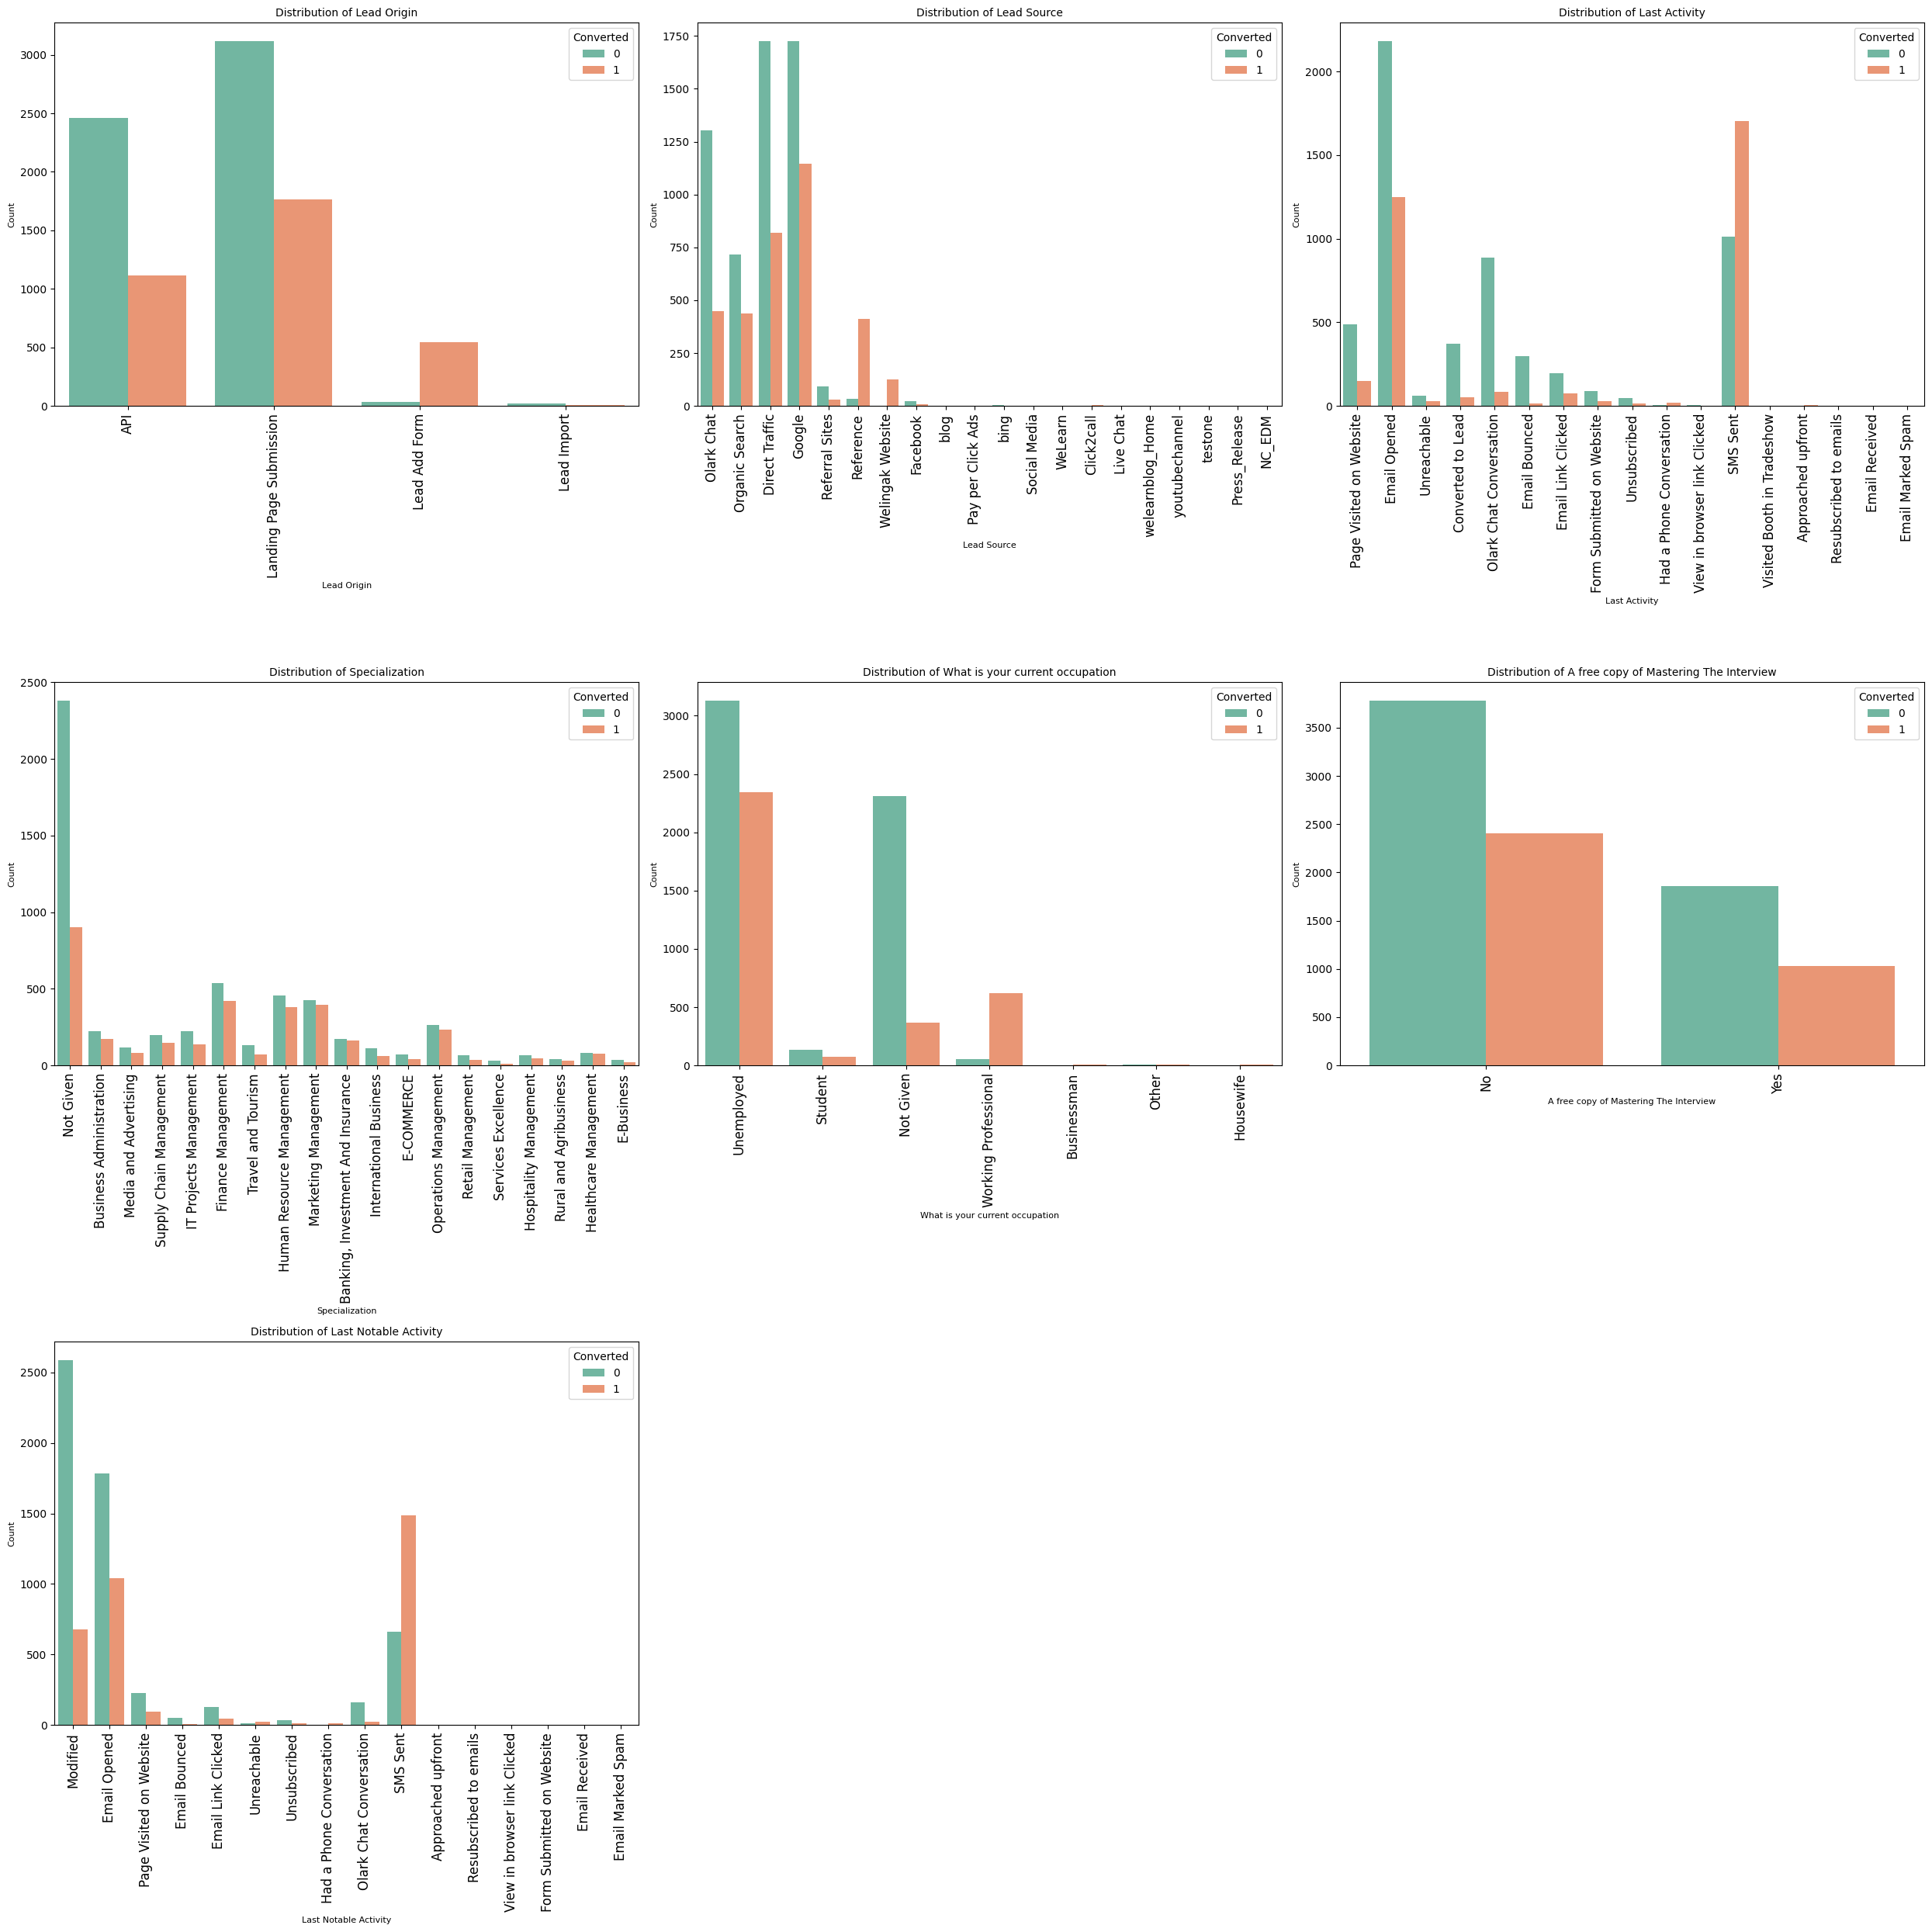

In [53]:

# List of columns to plot
col_2 = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
         'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']

# Set the number of rows and columns for the subplot grid
rows = 3 # Increased to fit all 9 plots
cols = 3

# Create a figure and axis object with the desired grid size
fig, axes = plt.subplots(rows, cols, figsize=(25, 25))  # Adjusted figsize

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Loop through each column and plot it in the respective subplot
for i, col in enumerate(col_2):
    # Create the count plot on the current axis
    sns.countplot(data=Lead_data, x=col,hue ="Converted", palette='Set2', ax=axes[i])

    # Set the title and labels for each subplot
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=8)
    axes[i].set_ylabel('Count', fontsize=8)

    # Rotate x-axis labels and set their font size
    axes[i].tick_params(axis='x', labelsize=12, rotation=90)

# Hide any unused subplots (if any)
for j in range(len(col_2), len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout so plots don't overlap
plt.tight_layout()

# Show the plot
plt.show()

# 0 means not converted
# 1 means converted


### Observation
- Landing Page Submission sees a high number of interactions but a relatively moderate conversion rate.
- Lead Add Form shows a strong conversion rate, suggesting that leads generated through this method are highly valuable.
- API and Lead Import origins have lower conversion rates, indicating less effectiveness in these channels for acquiring convertible leads.
- Google, Direct Traffic, and Olark Chat are effective sources with higher conversion rates, which are critical channels for generating quality leads.
- Facebook, Pay per Click Ads, and Social Media tend to generate many leads but have lower conversion rates, possibly due to less targeted audience engagement or lead quality issues.
- Activities like Email Opened and SMS Sent are associated with higher conversion rates, highlighting the effectiveness of proactive communication in engaging potential customers.
- Page Visited on Website, while generating a lot of activity, does not correspond to high conversion rates, indicating that many website visitors might not be deeply engaged or ready to convert.
-Leads with specified specializations such as Finance Management, Human Resource Management, and Marketing Management are more likely to convert compared to leads without a listed specialization.
- The large number of leads with no specialization might require a tailored approach or further engagement to improve conversion rates.
- Working Professionals convert at a significantly higher rate compared to other occupational statuses like Students or Unemployed. This suggests that targeting this demographic could yield higher conversion rates.
- The high volume of Unemployed leads with a lower conversion rate suggests potential inefficiencies in targeting or engagement strategies for this group.
- leads that did not request a free copy of "Mastering The Interview" converted at a higher rate than those who did, which may indicate that more serious or immediate buyers opt out of additional resources.
- The Email Opened, Olark Chat Conversation, and SMS Sent activities correlate strongly with lead conversion, underscoring the importance of these interactions in the lead nurturing process.
Activities signaling lack of engagement or negative responses, such as Email Bounced or Unsubscribed, naturally correspond to low conversion rates.



### 4.4 Multivariate Analysis

In [54]:
# Select only numeric columns
numeric_data = Lead_data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.032855,0.359261,0.000260
TotalVisits,0.032855,1.000000,0.219723,0.511068
Total Time Spent on Website,0.359261,0.219723,1.000000,0.318350
Page Views Per Visit,0.000260,0.511068,0.318350,1.000000


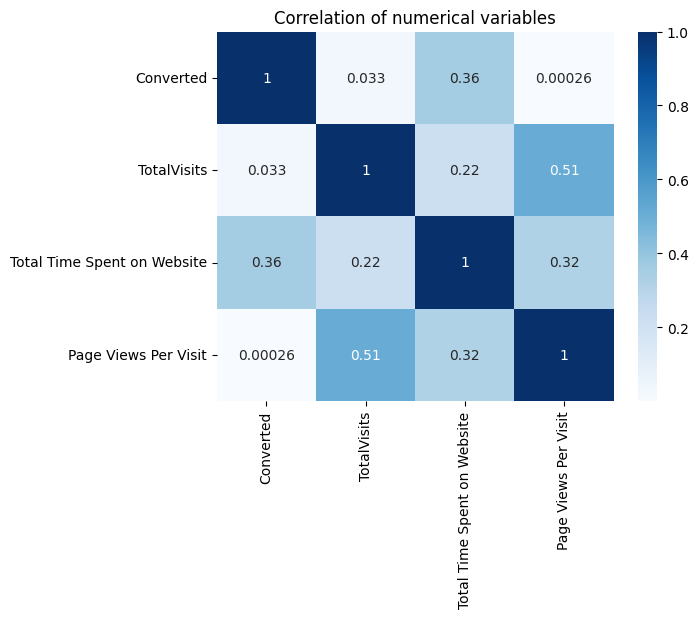

In [55]:
# Checking the correlation using heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation of numerical variables")

# Show the plot
plt.show()


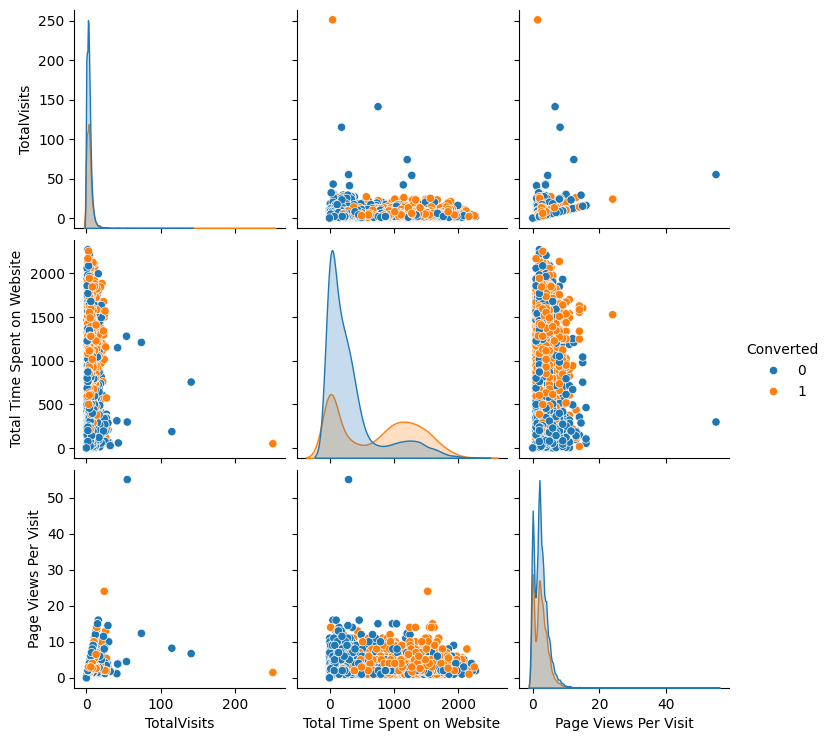

In [56]:
# Creating Pair plot for numerical variables

Nummerical_col = Lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(Nummerical_col,diag_kind='kde',hue='Converted')
plt.show()

### Observation

- Total Time Spent on Website has a moderate positive correlation (0.359) with conversion, meaning leads who spend more time are more likely to convert.
- Total Visits shows a very weak correlation (0.033) with conversion, indicating that visit frequency does not significantly impact lead conversion.
- Page Views Per Visit has almost no correlation (0.00026) with conversion, suggesting that browsing more pages does not lead to higher conversions.
- Total Visits and Page Views Per Visit are moderately correlated (0.511), implying that frequent visitors tend to explore more pages per visit.
- Total Time Spent on Website and Page Views Per Visit have a weak correlation (0.318), showing that those who view more pages per visit tend to spend more time on the website.








# Step 5: Prepare the data for model building


In [57]:
# checking the dataset before creating dummy variables
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Given,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Given,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Given,Unemployed,No,Modified


#### The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables are actually categorical variables.

In [58]:
cat_col = Lead_data.loc[:, Lead_data.dtypes == 'object']
print(cat_col.columns)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')


In [59]:
# Creating a dummy variables
dummy_col = pd.get_dummies(Lead_data[['Lead Origin', 'Lead Source','Specialization', 'Do Not Email', 'Last Activity','What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True, dtype=int)


In [60]:
# Checking the dummy_variables dataset

dummy_col.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
# Concat the dummy variable with Lead_data
Leads_data = pd.concat([Lead_data,dummy_col], axis = 1)

In [62]:
# Checking the columns of dataset after creating dummy variables

Leads_data.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Specialization_Business Admin

In [63]:
# Dropping some columns for reducing redundancy
Leads_data = Leads_data.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity','Specialization', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity'], axis = 1)

In [64]:
# # Dropping some columns for reducing redundancy

Leads_data = Leads_data.drop(['What is your current occupation_Not Given', 'Specialization_Not Given'], axis =1)

In [65]:
# checking final dataset after concating dummy variables

Leads_data.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### 5.1 Test Train Split
- now we split the data into dependent and independent variables

In [66]:
# Putting independent variable to X
X = Leads_data.drop("Converted", axis = 1)

In [67]:

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [68]:
# Putting target variable to y

y = Leads_data["Converted"]

In [69]:
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


### 5.2 Splitting the data into train and test data

In [70]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
# Splitting the data into train and test
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 100)

In [71]:
# Check the shape of test and training data

X_train.shape,X_test.shape, y_train.shape,y_test.shape

((6351, 80), (2723, 80), (6351,), (2723,))

### 5.3 Feature Scaling
- Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale these variables.

In [72]:
from sklearn.preprocessing import MinMaxScaler


In [73]:
# Scale the three numeric features present in the dataset
num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0.007968,0.178347,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.007968,0.085355,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.007968,0.619946,0.083333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.019920,0.711590,0.104167,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### 5.4 Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high.

In [74]:
X_train.corr()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
TotalVisits,1.000000,0.194837,0.467970,0.269443,-0.172404,-0.037380,0.087551,-0.036371,0.101538,-0.011916,...,-0.003571,0.015666,-0.100560,-0.038326,0.235597,-0.008425,-0.006087,0.008460,0.001745,0.010990
Total Time Spent on Website,0.194837,1.000000,0.326378,0.287445,-0.198886,-0.054374,0.148861,-0.053724,0.211562,-0.015772,...,-0.004544,0.024294,-0.125918,-0.045710,0.029070,-0.011152,0.143708,0.001036,0.016790,-0.009103
Page Views Per Visit,0.467970,0.326378,1.000000,0.493007,-0.292378,-0.059971,0.127462,-0.056820,0.218045,-0.020101,...,-0.002255,0.016540,-0.089296,-0.088973,0.027079,-0.014212,0.054423,0.023034,0.020688,0.001751
Lead Origin_Landing Page Submission,0.269443,0.287445,0.493007,1.000000,-0.291790,-0.066193,0.516152,-0.062521,0.081315,-0.019075,...,0.011676,0.004131,-0.072141,-0.117447,0.035681,-0.013487,0.048612,0.005264,0.009496,-0.013487
Lead Origin_Lead Add Form,-0.172404,-0.198886,-0.292378,-0.291790,1.000000,-0.016721,-0.168497,-0.017068,-0.186561,0.065373,...,-0.003407,-0.011813,-0.078809,-0.024172,-0.013768,-0.003407,0.126731,-0.007655,-0.018067,-0.003407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Resubscribed to emails,-0.008425,-0.011152,-0.014212,-0.013487,-0.003407,-0.000773,-0.007788,-0.000789,-0.008623,-0.000223,...,-0.000157,-0.000546,-0.009401,-0.001749,-0.002372,1.000000,-0.007136,-0.000805,-0.000835,-0.000157
Last Notable Activity_SMS Sent,-0.006087,0.143708,0.054423,0.048612,0.126731,-0.029053,0.007721,-0.024046,-0.003755,0.031210,...,-0.007136,-0.024743,-0.426023,-0.079254,-0.107471,-0.007136,1.000000,-0.036461,-0.037843,-0.007136
Last Notable Activity_Unreachable,0.008460,0.001036,0.023034,0.005264,-0.007655,-0.003949,-0.012272,-0.004031,0.019341,-0.001138,...,-0.000805,-0.002790,-0.048031,-0.008935,-0.012117,-0.000805,-0.036461,1.000000,-0.004267,-0.000805
Last Notable Activity_Unsubscribed,0.001745,0.016790,0.020688,0.009496,-0.018067,-0.004098,-0.009473,-0.004183,-0.004993,-0.001181,...,-0.000835,-0.002895,-0.049852,-0.009274,-0.012576,-0.000835,-0.037843,-0.004267,1.000000,-0.000835


In [75]:
Lead_data.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Given,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Given,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Given,Unemployed,No,Modified


In [76]:
### Checking the convertion Rate
convertion = (sum(Lead_data['Converted'])/len(Lead_data['Converted'].index))*100
convertion

37.85541106458012

# Step 6: Model Building

- Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

### 6.1 Using sklearn library

In [77]:
# Import 'LogisticRegression' and create a LogisticRegression object
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression()
logisticreg.fit(X_train, y_train)

LogisticRegression()

In [78]:
# Predict the test data
y_pred = logisticreg.predict(X_test)


In [79]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.47741461623209697


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report (includes precision, recall, F1-score, and accuracy)
print(classification_report(y_test, y_pred))


[[ 380 1354]
 [  69  920]]
              precision    recall  f1-score   support

           0       0.85      0.22      0.35      1734
           1       0.40      0.93      0.56       989

    accuracy                           0.48      2723
   macro avg       0.63      0.57      0.46      2723
weighted avg       0.69      0.48      0.43      2723



As we can see we are getting very low accuracy using all the variables

### 6.2 Using RFE
- RFE stands for Recursive Feature Elimination. It is a feature selection technique used in machine learning to select the most important features for model building.



In [81]:
# Import RFE and select 15 variables
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logisticreg, n_features_to_select=15) # n_features_to_select is the number of features you want to select
rfe = rfe.fit(X_train, y_train)

In [82]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 7),
 ('Lead Origin_Landing Page Submission', False, 28),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 47),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 5),
 ('Lead Source_Live Chat', False, 52),
 ('Lead Source_NC_EDM', False, 20),
 ('Lead Source_Olark Chat', False, 18),
 ('Lead Source_Organic Search', False, 3),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Referral Sites', False, 2),
 ('Lead Source_Social Media', False, 37),
 ('Lead Source_WeLearn', False, 66),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 64),
 ('Lead Source_blog', False, 46),
 ('Lead Source_testone', False, 43),
 ('Lead Source_welearnblog_Home', False, 51),
 ('Lead Source_youtubechannel', False,

In [83]:
# Put all the columns selected by RFE in the variable "selected_col"

selected_col = X_train.columns[rfe.support_]
selected_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Converted to Lead',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

### 6.3 Using stats Model

In [84]:
# Import statsmodels

import statsmodels.api as sm

### 6.4 Initiall Model:

In [85]:
# Logistic regression model with all the variables

X_train_sm = sm.add_constant(X_train)
logreg1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logreg1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6273
Model Family:                Binomial   Df Model:                           77
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2468.0
Date:                Mon, 23 Sep 2024   Deviance:                       4935.9
Time:                        23:51:59   Pearson chi2:                 6.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4264
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   22.3418   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              9.7302      2.460      3.955      0.000       4.909      14.552
Total Time Spent on Website                              4.6198      0.173     26.704      0.000       4.281       4.959
Page Views Per Visit                                    -1.3879      0.609     -2.279      0.023      -2.581      -0.194
Lead Origin_Landing Page Submission                     -0.5625      0.131     -4.308      0.000      -0.818      -0.307
Lead Origin_Lead Add Form                               -0.9676      1.568     -0.617      0.537      -4.041       2.106
Lead Origin_Lead Import                                 24.3272   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Direct Traffic                              -2.9032      2.037     -1.425      0.154      -6.896       1.090
Lead Source_Facebook                                   -26.1646   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Google                                      -2.6205      2.035     -1.288      0.198      -6.609       1.368
Lead Source_Live Chat                                   22.3221   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      21.8208   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                  -1.5124      2.028     -0.746      0.456      -5.488       2.463
Lead Source_Organic Search                              -2.8035      2.038     -1.376      0.169      -6.798       1.191
Lead Source_Pay per Click Ads                          -24.5734   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                              -23.0012   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Reference                                    1.5032      1.308      1.149      0.251      -1.061       4.067
Lead Source_Referral Sites                              -2.9718      2.065     -1.439      0.150      -7.018       1.075
Lead Source_Social Media                                -0.9197      2.547     -0.361      0.718      -5.911       4.072
Lead Source_WeLearn                                   2.167e-09   4.34e-06      0.000      1.000    -8.5e-06    8.51e-06
Lead Source_Welingak Website                             3.7356      1.481      2.522      0.012       0.832       6.639
Lead Source_bing                                        -2.0058      2.489     -0.806      0.420      -6.883       2.872
Lead Source_blog                                       -24

###  6.4 Creating model variables based on those selected by RFE

### 6.4.1 Model 1

In [86]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[selected_col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2641.5
Date:                Mon, 23 Sep 2024   Deviance:                       5283.1
Time:                        23:51:59   Pearson chi2:                 6.05e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3942
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.7008      0.095    -28.413      0.000      -2.887      -2.515
Total Time Spent on Website                              3.8457      0.146     26.370      0.000       3.560       4.132
Lead Origin_Lead Add Form                                3.0105      0.218     13.801      0.000       2.583       3.438
Lead Source_Direct Traffic                              -0.5539      0.078     -7.100      0.000      -0.707      -0.401
Lead Source_Welingak Website                             1.9758      0.751      2.632      0.008       0.505       3.447
Do Not Email_Yes                                        -1.6235      0.169     -9.607      0.000      -1.955      -1.292
Last Activity_Converted to Lead                         -1.3628      0.217     -6.285      0.000      -1.788      -0.938
Last Activity_Had a Phone Conversation                   2.3030      0.731      3.152      0.002       0.871       3.735
Last Activity_Olark Chat Conversation                   -1.0164      0.163     -6.249      0.000      -1.335      -0.698
Last Activity_SMS Sent                                   1.2167      0.074     16.388      0.000       1.071       1.362
What is your current occupation_Housewife               23.5869   1.61e+04      0.001      0.999   -3.16e+04    3.16e+04
What is your current occupation_Other                    1.9332      0.714      2.708      0.007       0.534       3.332
What is your current occupation_Student                  1.4300      0.231      6.194      0.000       0.978       1.883
What is your current occupation_Unemployed               1.2017      0.087     13.820      0.000       1.031       1.372
What is your current occupation_Working Professional     3.6566      0.198     18.491      0.000       3.269       4.044
Last Notable Activity_Unreachable                        1.8443      0.496      3.721      0.000       0.873       2.816
========================================================================================================================
"""

There are quite a few variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [87]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X_train_new = X_train[selected_col]
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,2.10
0,Total Time Spent on Website,1.85
1,Lead Origin_Lead Add Form,1.60
8,Last Activity_SMS Sent,1.55
2,Lead Source_Direct Traffic,1.44
3,Lead Source_Welingak Website,1.33
13,What is your current occupation_Working Profes...,1.31
4,Do Not Email_Yes,1.08
5,Last Activity_Converted to Lead,1.06
7,Last Activity_Olark Chat Conversation,1.05


VIFs seem to be in a decent range

In [89]:
# dropping column "What is your current occupation_Housewife" because having very high p value

selected_col = selected_col.drop("What is your current occupation_Housewife")

### 6.4.2 Model 2

In [90]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[selected_col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2649.2
Date:                Mon, 23 Sep 2024   Deviance:                       5298.5
Time:                        23:51:59   Pearson chi2:                 6.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3927
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6744      0.094    -28.390      0.000      -2.859      -2.490
Total Time Spent on Website                              3.8479      0.146     26.432      0.000       3.563       4.133
Lead Origin_Lead Add Form                                3.0655      0.218     14.034      0.000       2.637       3.494
Lead Source_Direct Traffic                              -0.5526      0.078     -7.094      0.000      -0.705      -0.400
Lead Source_Welingak Website                             1.9243      0.751      2.563      0.010       0.453       3.396
Do Not Email_Yes                                        -1.6283      0.169     -9.633      0.000      -1.960      -1.297
Last Activity_Converted to Lead                         -1.3690      0.217     -6.317      0.000      -1.794      -0.944
Last Activity_Had a Phone Conversation                   2.2985      0.730      3.147      0.002       0.867       3.730
Last Activity_Olark Chat Conversation                   -1.0249      0.163     -6.305      0.000      -1.343      -0.706
Last Activity_SMS Sent                                   1.2081      0.074     16.293      0.000       1.063       1.353
What is your current occupation_Other                    1.9072      0.714      2.672      0.008       0.508       3.306
What is your current occupation_Student                  1.4025      0.231      6.078      0.000       0.950       1.855
What is your current occupation_Unemployed               1.1765      0.086     13.647      0.000       1.008       1.345
What is your current occupation_Working Professional     3.6304      0.197     18.388      0.000       3.243       4.017
Last Notable Activity_Unreachable                        1.8304      0.495      3.699      0.000       0.860       2.800
========================================================================================================================
"""

In [91]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X_train_new = X_train[selected_col]
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.10
0,Total Time Spent on Website,1.85
1,Lead Origin_Lead Add Form,1.59
8,Last Activity_SMS Sent,1.55
2,Lead Source_Direct Traffic,1.44
3,Lead Source_Welingak Website,1.33
12,What is your current occupation_Working Profes...,1.31
4,Do Not Email_Yes,1.08
5,Last Activity_Converted to Lead,1.06
7,Last Activity_Olark Chat Conversation,1.05


In [92]:
# dropping column "What is your current occupation_Other" because having very high p value

selected_col = selected_col.drop("What is your current occupation_Other")

### 6.4.3 Model 3

In [93]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[selected_col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2652.7
Date:                Mon, 23 Sep 2024   Deviance:                       5305.5
Time:                        23:52:00   Pearson chi2:                 6.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3921
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6553      0.094    -28.374      0.000      -2.839      -2.472
Total Time Spent on Website                              3.8577      0.146     26.510      0.000       3.573       4.143
Lead Origin_Lead Add Form                                3.0666      0.218     14.045      0.000       2.639       3.495
Lead Source_Direct Traffic                              -0.5519      0.078     -7.087      0.000      -0.705      -0.399
Lead Source_Welingak Website                             1.9246      0.751      2.564      0.010       0.453       3.396
Do Not Email_Yes                                        -1.6214      0.169     -9.606      0.000      -1.952      -1.291
Last Activity_Converted to Lead                         -1.3749      0.217     -6.345      0.000      -1.800      -0.950
Last Activity_Had a Phone Conversation                   2.2940      0.730      3.143      0.002       0.863       3.725
Last Activity_Olark Chat Conversation                   -1.0244      0.162     -6.305      0.000      -1.343      -0.706
Last Activity_SMS Sent                                   1.2024      0.074     16.239      0.000       1.057       1.348
What is your current occupation_Student                  1.3813      0.231      5.992      0.000       0.930       1.833
What is your current occupation_Unemployed               1.1566      0.086     13.509      0.000       0.989       1.324
What is your current occupation_Working Professional     3.6103      0.197     18.312      0.000       3.224       3.997
Last Notable Activity_Unreachable                        1.8201      0.494      3.682      0.000       0.851       2.789
========================================================================================================================
"""

In [94]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X_train_new = X_train[selected_col]
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.10
0,Total Time Spent on Website,1.84
1,Lead Origin_Lead Add Form,1.59
8,Last Activity_SMS Sent,1.55
2,Lead Source_Direct Traffic,1.44
3,Lead Source_Welingak Website,1.33
11,What is your current occupation_Working Profes...,1.31
4,Do Not Email_Yes,1.08
5,Last Activity_Converted to Lead,1.06
7,Last Activity_Olark Chat Conversation,1.05


In [95]:
# dropping column "Last Activity_Had a Phone Conversation" because having very high p value

selected_col = selected_col.drop("Last Activity_Had a Phone Conversation")

### 6.4.4 Model 4

In [96]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[selected_col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2658.9
Date:                Mon, 23 Sep 2024   Deviance:                       5317.8
Time:                        23:52:00   Pearson chi2:                 6.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6456      0.093    -28.325      0.000      -2.829      -2.463
Total Time Spent on Website                              3.8584      0.145     26.552      0.000       3.574       4.143
Lead Origin_Lead Add Form                                3.0552      0.218     13.999      0.000       2.627       3.483
Lead Source_Direct Traffic                              -0.5594      0.078     -7.190      0.000      -0.712      -0.407
Lead Source_Welingak Website                             1.9246      0.751      2.564      0.010       0.453       3.396
Do Not Email_Yes                                        -1.6184      0.169     -9.591      0.000      -1.949      -1.288
Last Activity_Converted to Lead                         -1.3864      0.217     -6.399      0.000      -1.811      -0.962
Last Activity_Olark Chat Conversation                   -1.0377      0.162     -6.389      0.000      -1.356      -0.719
Last Activity_SMS Sent                                   1.1903      0.074     16.104      0.000       1.045       1.335
What is your current occupation_Student                  1.3780      0.230      5.981      0.000       0.926       1.830
What is your current occupation_Unemployed               1.1630      0.086     13.596      0.000       0.995       1.331
What is your current occupation_Working Professional     3.6118      0.197     18.333      0.000       3.226       3.998
Last Notable Activity_Unreachable                        1.8088      0.495      3.658      0.000       0.840       2.778
========================================================================================================================
"""

In [97]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X_train_new = X_train_new[selected_col]
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,What is your current occupation_Unemployed,2.09
0,Total Time Spent on Website,1.84
1,Lead Origin_Lead Add Form,1.59
7,Last Activity_SMS Sent,1.54
2,Lead Source_Direct Traffic,1.43
3,Lead Source_Welingak Website,1.33
10,What is your current occupation_Working Profes...,1.31
4,Do Not Email_Yes,1.08
5,Last Activity_Converted to Lead,1.06
6,Last Activity_Olark Chat Conversation,1.05


In [98]:
# dropping column "Lead Source_Welingak Website	" because having very high p value

selected_col = selected_col.drop("Lead Source_Welingak Website")

### 6.4.5 Model 5

In [99]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[selected_col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2664.2
Date:                Mon, 23 Sep 2024   Deviance:                       5328.4
Time:                        23:52:00   Pearson chi2:                 6.21e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3899
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.6494      0.093    -28.349      0.000      -2.833      -2.466
Total Time Spent on Website                              3.8578      0.145     26.551      0.000       3.573       4.143
Lead Origin_Lead Add Form                                3.3878      0.207     16.340      0.000       2.981       3.794
Lead Source_Direct Traffic                              -0.5596      0.078     -7.194      0.000      -0.712      -0.407
Do Not Email_Yes                                        -1.5981      0.167     -9.583      0.000      -1.925      -1.271
Last Activity_Converted to Lead                         -1.3834      0.217     -6.388      0.000      -1.808      -0.959
Last Activity_Olark Chat Conversation                   -1.0322      0.162     -6.369      0.000      -1.350      -0.715
Last Activity_SMS Sent                                   1.1934      0.074     16.160      0.000       1.049       1.338
What is your current occupation_Student                  1.3682      0.231      5.912      0.000       0.915       1.822
What is your current occupation_Unemployed               1.1661      0.086     13.624      0.000       0.998       1.334
What is your current occupation_Working Professional     3.6026      0.197     18.264      0.000       3.216       3.989
Last Notable Activity_Unreachable                        1.8089      0.495      3.655      0.000       0.839       2.779
========================================================================================================================
"""

In [100]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
X_train_new = X_train_new[selected_col]
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,2.09
0,Total Time Spent on Website,1.84
6,Last Activity_SMS Sent,1.54
2,Lead Source_Direct Traffic,1.43
9,What is your current occupation_Working Profes...,1.28
1,Lead Origin_Lead Add Form,1.25
3,Do Not Email_Yes,1.08
4,Last Activity_Converted to Lead,1.06
5,Last Activity_Olark Chat Conversation,1.05
7,What is your current occupation_Student,1.04


#  Step 7: Model Evaluation

- Since both the p-values and VIFs are satisfactory for all the variables, we can proceed with making predictions using this final set of features.

In [101]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
3009,0.074400
1012,0.294169
9226,0.428026
4750,0.592915
7987,0.869400
1281,0.804623
2880,0.066455
4971,0.912763
7536,0.799810
1248,0.851307


In [102]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.07440015, 0.29416876, 0.42802605, 0.59291508, 0.86940005,
       0.80462323, 0.0664555 , 0.91276262, 0.79980985, 0.85130665])

### 7.1 Creating a dataframe with the actual conversion flag and the predicted probabilities

In [103]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.074400
1,0,0.294169
2,0,0.428026
3,1,0.592915
4,1,0.869400


### 7.2 Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [104]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.074400,0
1,0,0.294169,0
2,0,0.428026,0
3,1,0.592915,1
4,1,0.869400,1


### 7.3 Creating the `Confusion matrix`


In [105]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3434  471]
 [ 788 1658]]


In [106]:
# Checking the matrix accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8017635018107385


### 7.4  Metrics beyond simply accuracy

In [107]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Calculating the sensitivity
TP/(TP+FN)

0.6778413736713

In [109]:
# Calculating the specificity
TN/(TN+FP)

0.8793854033290653

In [110]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1206145966709347


In [111]:
# positive predictive value
print (TP / float(TP+FP))

0.778769375293565


In [112]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8133585978209379


- With the current cut off as 0.5 we have around 81% accuracy, sensitivity of around 70% and specificity of around 87%

### 7.5 Optimise Cut off (ROC Curve)
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

- The previous cut off was randomely selected. Now to find the optimum one

In [113]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [114]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

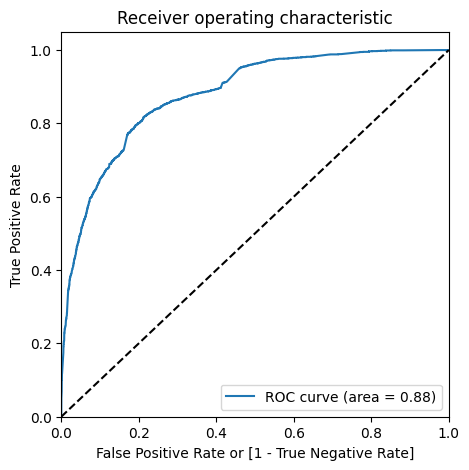

In [115]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The area under the ROC curve is 0.88.








### 7.6 Finding Optimal Cutoff Point

In [116]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.074400,0,1,0,0,0,0,0,0,0,0,0
1,0,0.294169,0,1,1,1,0,0,0,0,0,0,0
2,0,0.428026,0,1,1,1,1,1,0,0,0,0,0
3,1,0.592915,1,1,1,1,1,1,1,0,0,0,0
4,1,0.869400,1,1,1,1,1,1,1,1,1,1,0


In [117]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.624469  0.978332  0.402817
0.2   0.2  0.719729  0.890025  0.613060
0.3   0.3  0.785703  0.840556  0.751344
0.4   0.4  0.804125  0.781276  0.818438
0.5   0.5  0.801764  0.677841  0.879385
0.6   0.6  0.797670  0.598528  0.922407
0.7   0.7  0.779090  0.507768  0.949040
0.8   0.8  0.755629  0.415781  0.968502
0.9   0.9  0.702094  0.242845  0.989757


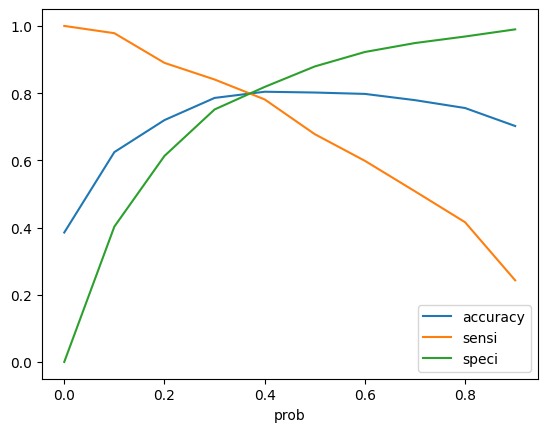

In [118]:
# plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The graph indicates that the optimal cut-off point is at 0.35.











In [119]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.074400,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.294169,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.428026,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.592915,1,1,1,1,1,1,1,0,0,0,0,1
4,1,0.869400,1,1,1,1,1,1,1,1,1,1,0,1


In [120]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.074400,0,1,0,0,0,0,0,0,0,0,0,0,7
1,0,0.294169,0,1,1,1,0,0,0,0,0,0,0,0,29
2,0,0.428026,0,1,1,1,1,1,0,0,0,0,0,1,43
3,1,0.592915,1,1,1,1,1,1,1,0,0,0,0,1,59
4,1,0.869400,1,1,1,1,1,1,1,1,1,1,0,1,87


In [121]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7979845693591561

In [122]:
# Creating Confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3093,  812],
       [ 471, 1975]])

In [123]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [124]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8074407195421096

In [125]:
# calculate specificity
TN / float(TN+FP)

0.7920614596670935

In [126]:
# Calculate false positive rate
print(FP/ float(TN+FP))

0.20793854033290654


In [127]:
# Positive predictive value
print (TP / float(TP+FP))

0.7086472909939002


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8678451178451179



# Step 8: Precision and Recall

In [129]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3434,  471],
       [ 788, 1658]])

In [130]:
# Using sklearn utilities
from sklearn.metrics import precision_score, recall_score

# Calculating Precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.778769375293565

In [131]:
# calculating Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.6778413736713

### 8.1 Precision and recall tradeoff

In [132]:
# import library
from sklearn.metrics import precision_recall_curve

In [133]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    1
 Name: Predicted, Length: 6351, dtype: int64)

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

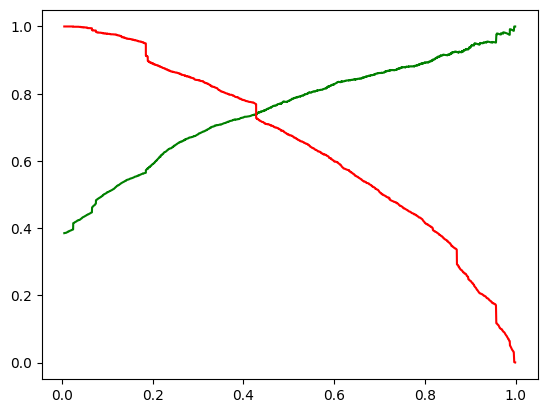

In [135]:
# Plotting the graph
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# Step 9: Making predictions on the test set

In [136]:
# scaling the test dataset using transform
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

In [137]:
selected_col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [138]:
X_test = X_test[selected_col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3271,0.070530,0,0,0,0,0,0,0,0,0,0
1490,0.679695,0,1,0,0,0,0,0,0,1,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0
4216,0.000000,1,0,0,0,0,0,1,0,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0


In [139]:
X_test_sm = sm.add_constant(X_test)

In [140]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [142]:
# Let's see the head
y_pred_1.head()

,0
3271,0.084921
1490,0.953279
7936,0.074389
4216,0.891547
3830,0.085868


In [143]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [144]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,0
0,0,0.084921
1,1,0.953279
2,0,0.074389
3,1,0.891547
4,0,0.085868


In [147]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convertion_Prob_test'})

In [148]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,Convertion_Prob_test
0,0,0.084921
1,1,0.953279
2,0,0.074389
3,1,0.891547
4,0,0.085868


In [149]:
y_pred_final['final_predicted'] = y_pred_final.Convertion_Prob_test.map(lambda x: 1 if x > 0.35 else 0)

In [150]:
y_pred_final['Lead_Score'] = y_pred_final.Convertion_Prob_test.map( lambda x: round(x*100))


In [151]:
y_pred_final.head()

,Converted,Convertion_Prob_test,final_predicted,Lead_Score
0,0,0.084921,0,8
1,1,0.953279,1,95
2,0,0.074389,0,7
3,1,0.891547,1,89
4,0,0.085868,0,9


In [152]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8046272493573264

In [153]:
confusion3 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[1402,  332],
       [ 200,  789]])

In [154]:
TP = confusion3[1,1] # true positive
TN = confusion3[0,0] # true negatives
FP = confusion3[0,1] # false positives
FN = confusion3[1,0] # false negatives

In [155]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7977755308392316

In [156]:
# Let us calculate specificity
TN / float(TN+FP)

0.8085351787773933


# Let’s evaluate the model's performance using other algorithms, such as K-Nearest Neighbors and Decision Trees

## Using Knearest

In [157]:
X_train_new = X_train[selected_col]
X_train_new.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3009,0.178347,0,1,0,0,0,0,0,0,0,0
1012,0.085355,0,1,1,0,0,0,0,0,1,0
9226,0.000000,0,0,0,0,0,1,0,1,0,0
4750,0.619946,0,1,0,0,0,1,0,0,0,0
7987,0.711590,0,1,0,0,0,1,0,1,0,0


In [158]:
X_test_new = X_test[selected_col]
X_test_new.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Unreachable
3271,0.070530,0,0,0,0,0,0,0,0,0,0
1490,0.679695,0,1,0,0,0,0,0,0,1,0
7936,0.033243,0,0,0,0,0,0,0,0,0,0
4216,0.000000,1,0,0,0,0,0,1,0,0,0
3830,0.073675,0,0,0,0,0,0,0,0,0,0


In [159]:
y_test

,Converted
3271,0
1490,1
7936,0
4216,1
3830,0
...,...
850,0
2879,0
6501,1
7155,0


In [160]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model to the training data
knn.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_new)

# Evaluate the model's performance
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Confusion Matrix:
 [[1507  227]
 [ 304  685]]
Accuracy: 0.8049944913698127
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1734
           1       0.75      0.69      0.72       989

    accuracy                           0.80      2723
   macro avg       0.79      0.78      0.79      2723
weighted avg       0.80      0.80      0.80      2723



#### The accuracy is lower compared to the logistic regression model.








## Using Decision tree

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize the Decision Tree classifier
dtree = DecisionTreeClassifier(random_state=42)  # You can adjust parameters as needed

# Fit the model to the training data
dtree.fit(X_train_new, y_train)

# Make predictions on the test set
y_pred = dtree.predict(X_test_new)

# Evaluate the model's performance
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", confusion)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Confusion Matrix:
 [[1455  279]
 [ 326  663]]
Accuracy: 0.7778185824458318
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1734
           1       0.70      0.67      0.69       989

    accuracy                           0.78      2723
   macro avg       0.76      0.75      0.76      2723
weighted avg       0.78      0.78      0.78      2723



In [162]:
X[selected_col].columns

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Direct Traffic', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable'],
      dtype='object')

# Determing importance of feature

In [163]:
coefficients = pd.DataFrame({
    'Feature': X_train_sm.columns,
    'Coefficient': res.params,
    'P-Value': res.pvalues
})

# Sort by absolute value of the coefficient to see the most influential features
coefficients['Abs_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_sorted = coefficients.sort_values(by='Abs_Coefficient', ascending=False)

# Print or display the coefficients sorted by importance
coefficients_sorted



,Feature,Coefficient,P-Value,Abs_Coefficient
Total Time Spent on Website,Total Time Spent on Website,3.857843,2.529133e-155,3.857843
What is your current occupation_Working Professional,What is your current occupation_Working Profes...,3.602588,1.590776e-74,3.602588
Lead Origin_Lead Add Form,Lead Origin_Lead Add Form,3.387802,5.149867e-60,3.387802
const,const,-2.649388,8.711315e-177,2.649388
Last Notable Activity_Unreachable,Last Notable Activity_Unreachable,1.808899,2.574264e-04,1.808899
Do Not Email_Yes,Do Not Email_Yes,-1.598078,9.466260e-22,1.598078
Last Activity_Converted to Lead,Last Activity_Converted to Lead,-1.383438,1.677507e-10,1.383438
What is your current occupation_Student,What is your current occupation_Student,1.368223,3.375841e-09,1.368223
Last Activity_SMS Sent,Last Activity_SMS Sent,1.193393,9.678163e-59,1.193393
What is your current occupation_Unemployed,What is your current occupation_Unemployed,1.166086,2.865043e-42,1.166086


The use of the absolute function (abs()) in the context of sorting coefficients serves a specific purpose:

Magnitude Over Direction: The absolute value of a coefficient indicates the magnitude of its impact on the target variable, regardless of whether the relationship is positive or negative. By using abs(), you can assess which features have the strongest influence on the outcome without considering whether they increase or decrease the probability of the target event.

Feature Importance: In logistic regression, both positive and negative coefficients can be important. A high positive coefficient indicates a strong positive correlation with the outcome, while a high negative coefficient indicates a strong negative correlation. Sorting by absolute values helps identify the most influential features overall.

Simplified Comparison: When evaluating multiple features, using absolute values simplifies the comparison process, as it allows you to focus solely on the strength of influence rather than the direction.

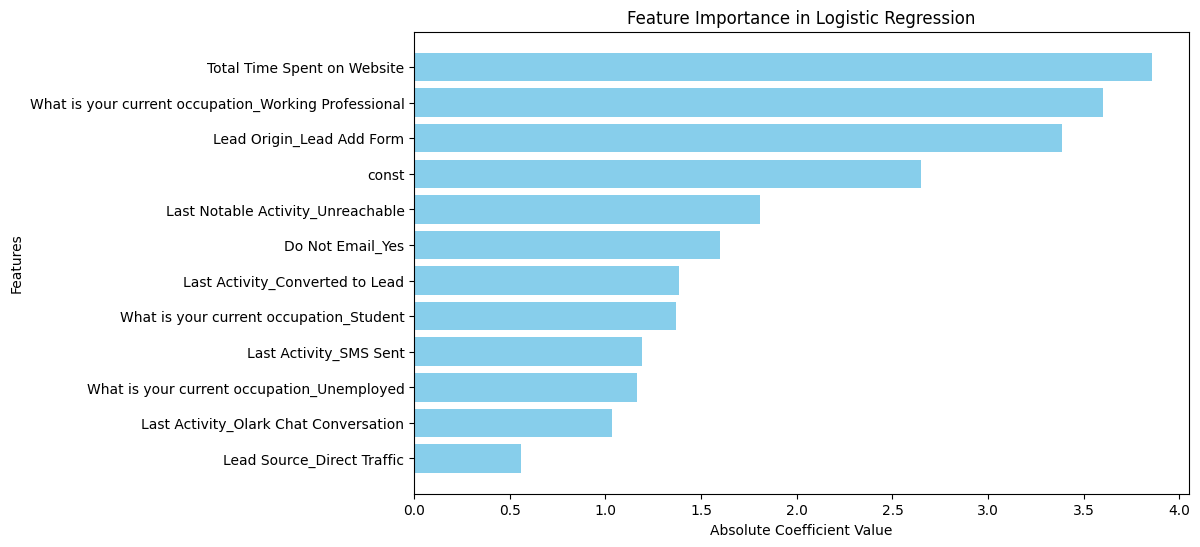

In [164]:
plt.figure(figsize=(10, 6))
plt.barh(coefficients_sorted['Feature'], coefficients_sorted['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance in Logistic Regression')
plt.gca().invert_yaxis()  # Display the highest values at the top
plt.show()


# Final observation

- Total Time Spent on Website has the highest positive impact on lead conversion. The more time a lead spends on the website, the higher their likelihood of conversion. This is a strong indicator that website engagement is crucial.

- Lead Origin - Lead Add Form also has a strong positive influence. Leads generated from forms added to the website are more likely to convert.

- What is your current occupation - Working Professional is a significant positive predictor. Working professionals have a higher probability of converting into paying customers.

- Last Notable Activity - Modified has a strong negative influence, meaning that leads whose last notable activity was modifying their information are less likely to convert.

- Do Not Email - Yes has a notable negative impact. Leads that opted out of email communications are less likely to convert, which suggests that email communication plays a crucial role in nurturing leads.

- Last Notable Activity - Email Link Clicked and Page Visited on Website are strong negative predictors. These activities alone may not indicate a high likelihood of conversion, especially if there are no further actions.

- Last Activity - Olark Chat Conversation has a moderate negative impact, meaning leads that primarily engage through chat without other activities tend to convert less.

- Lead Source - Direct Traffic has a small negative effect on conversion, indicating that leads coming from direct website traffic may not convert as well as others.

